In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import qdatoolkit as qda

**<h1 style="color:orange">EXERCISE CLASS 1 (Part 2/2)</h3>**

# **Hypothesis testing in the presence of two samples** 

## **Case: paired data**

Paired data = with correlation.

One example is when I do control studies,

the statistic is called T.

# **EXERCISE 2 - HYPOTESIS TESTING ON PAIRED DATA**

Ten people are involved in a diet program. The weights before and after the program is reported in the table (expressed in pounds, 1 lb =0.454). The data is stored in the file `ESE2_ex3.csv`.

Assume than the assumptions of normality and independence have been checked and verified as in Exercise 1

1. Is there statistical evidence (95%) to state that the diet program was effective?
2. Design a two-sided confidence interval at 95% on the weight difference

In [ ]:
# Import the dataset
data = pd.read_csv('weights.csv')

# Inspect the dataset
data.head()

In [ ]:
# Let's plot the data first
plt.plot(data['before'], 'o-', label='before')
plt.plot(data['after'], 'o-', label='after')
plt.xlabel('Index')
plt.ylabel('Weight (lbs)')
plt.legend()
plt.grid()
plt.show()

### Point 1

Is there statistical evidence (95%) to state that the diet program was effective?

> Data are PAIRED, so we are interested in the difference between the two: 

In [ ]:
# Plot the difference d
plt.plot(data['d'], 'o-')
plt.xlabel('Index')
plt.ylabel('Difference (lbs)')
plt.grid()
plt.show()

> Knowing that the data are normally distributed, we can use the t-test to evaluate the following hypothesis: $H_0: \mu_d$ = 0     vs   $H_1: \mu_d > 0 $
>
> The t-test statistic is:
> $$ t_0 = \frac{\bar{d}}{s_d/\sqrt{n}} $$
> where $\bar{d}$ is the sample mean of the differences, $s_d$ is the sample standard deviation of the differences and $n$ is the number of observations.

In [ ]:
# Compute the t-statistic and the corresponding p-value:

n = len(data['d'])  # number of samples
df = n - 1          # degrees of freedom

t0_stats, p_value_t0_stats = stats.ttest_1samp(data['d'], popmean = 0, alternative='greater')
print('t-statistic from stats.ttest_1samp: %.3f' % t0_stats)
print('p-value from stats.ttest_1samp: %.3f' % p_value_t0_stats)

### Point 2

Design a two-sided confidence interval at 95% on the weight difference.

> The corresponding confidence interval is:
> $$ \bar{d} - t_{\alpha/2, n-1} \frac{s_d}{\sqrt{n}} \leq \mu_d \leq \bar{d} + t_{\alpha/2, n-1} \frac{s_d}{\sqrt{n}} $$

In [ ]:
CL = 0.95       # confidence level
alpha = 1 - CL  # significance level

CI = stats.t.interval(CL, df, loc=data['d'].mean(), scale=data['d'].std() / np.sqrt(n))
print('Confidence interval: (%.3f, %.3f)' % (CI[0], CI[1]))

# **EXERCISE 3 - HYPOTESIS TESTING ON NOT PAIRED DATA**

We want to evaluate the resistance of resistors provided by two different suppliers. The data is stored in the file `ESE2_ex4.csv`. Assume that the assumptions of independence and normality have already been checked and verified as in Exercise 1.

1.  What can we infer about the mean resistance of the resistors provided by the two different suppliers?
2. Compute the Type II error expression in the variance equality test and compute the test power when the true variance of the first supplier is 1.5 times larger than the one of the second supplier

>Preliminary activity: dataset inspection

In [ ]:
# Import the dataset
data = pd.read_csv('resistance.csv')

# Inspect the dataset
data.head()

In [ ]:
# Inspect the data:
data.describe()

In [ ]:
# The dataset contains NaN values because the number of observations is different for each supplier. We need to remove them.

# Let's split the dataset into two dataframes, one for each supplier
data1 = data['supp1']
data2 = data['supp2']

# and remove the nan values from data1
data1 = data1.dropna()

### Point 1

What can we infer about the mean resistance of the resistors provided by the two different suppliers?

> We want to compare the means of two populations.
> Variances are unknown, thus there are two possible situations:
> - Equal (unknown) variances
> - Different (unknown) variances
> 
>
> **First step: hypothesis test on the equality of variances** 
>
> Null hypothesis: the two variances are equal
> $$H_0: \sigma_1^2 = \sigma_2^2$$
> Alternative hypothesis: the two variances are different
> $$H_1: \sigma_1^2 \neq \sigma_2^2$$
>
> This hypothesis test is equivalent to:
> 
> $$H_0: \frac{\sigma_1^2}{\sigma_2^2} = 1$$
>
> $$H_1: \frac{\sigma_1^2}{\sigma_2^2} \neq 1$$
>
> We can use the F-test to test the equality of variances. The test statistic is:
> $$F_0 = \frac{s_1^2}{s_2^2}$$
> 
> The corresponding confidence interval is:
> $$\frac{s_1^2}{s_2^2} F_{1-\alpha/2, n_2-1, n_1-1} \leq \frac{\sigma_1^2}{\sigma_2^2} \leq \frac{s_1^2}{s_2^2} F_{\alpha/2, n_2-1, n_1-1}$$

> **F-TEST:**

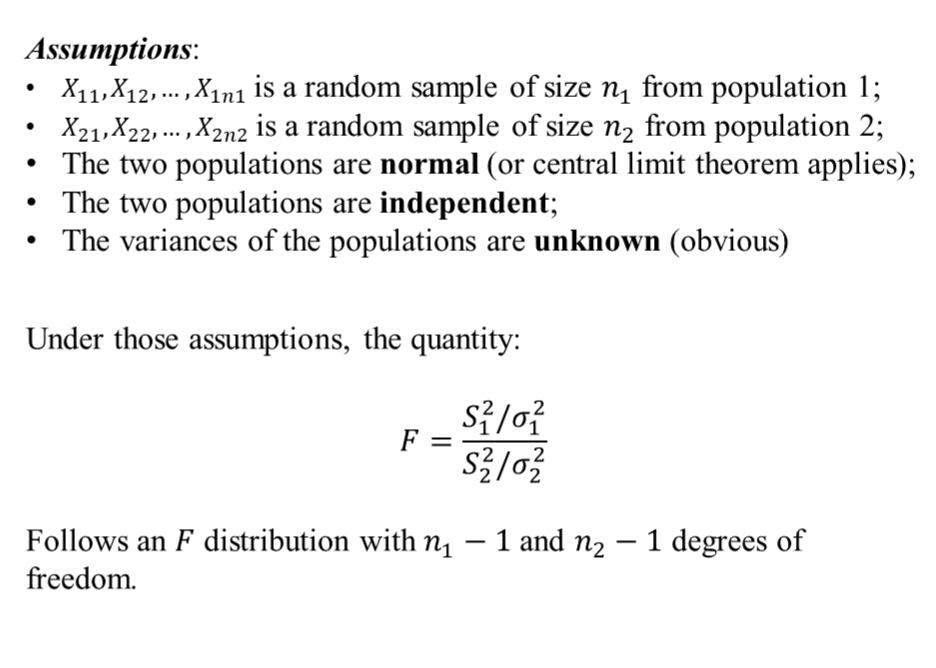

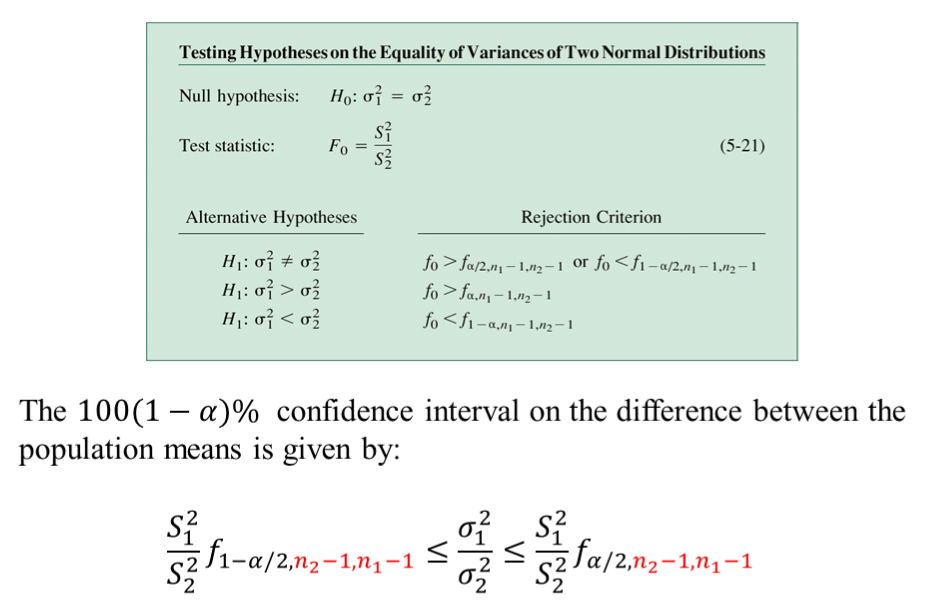

In [ ]:
CL = 0.95       # Confidence level
alpha = 1 - CL  # Significance level

n1 = len(data1) # number of observations for supplier 1
n2 = len(data2) # number of observations for supplier 2

In [ ]:
############### Test the equality of variances: F-test ################

df1 = n1 - 1 # degrees of freedom for supplier 1
df2 = n2 - 1 # degrees of freedom for supplier 2

F0 = data1.var()/data2.var()
CI = [F0 * stats.f.ppf(alpha/2, df2, df1), F0 * stats.f.ppf(1-alpha/2, df2, df1)]
print('Confidence interval on the ratio of variances (CL = %.2f): [%.3f, %.3f]' % (CL, CI[0], CI[1]))

# There is NO statistical evidence to state that the two variances are different (accept null hypothesis), because the interval includes 1. 

In [ ]:
# Compute also the p-value:
p_value_F0 = 2 * stats.f.cdf(F0, df1, df2)
print('p-value for F-test for equal variances: %.3f' % p_value_F0)

> Now that we have verified the equality of variances, we can perform the t-test (with equal variances). So we can use the `ttest_ind` function from `scipy.stats` and set the `equal_var` parameter to `True`.
>
> Remember the formula of the two-sample t-test: 
> $$T = \frac{(\bar{X}_1 - \bar{X}_2)-(\mu_1 - \mu_2)}{S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$
>
> where:
> $$S_p^2 = \frac{(n_1-1)S_1^2 + (n_2-1)S_2^2}{n_1+n_2-2}$$

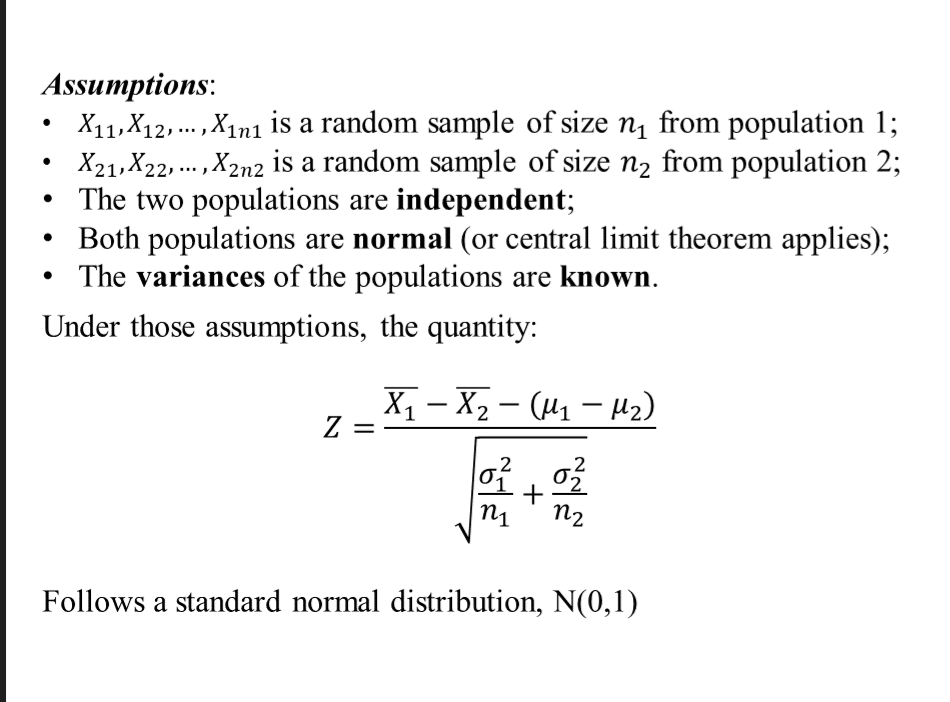

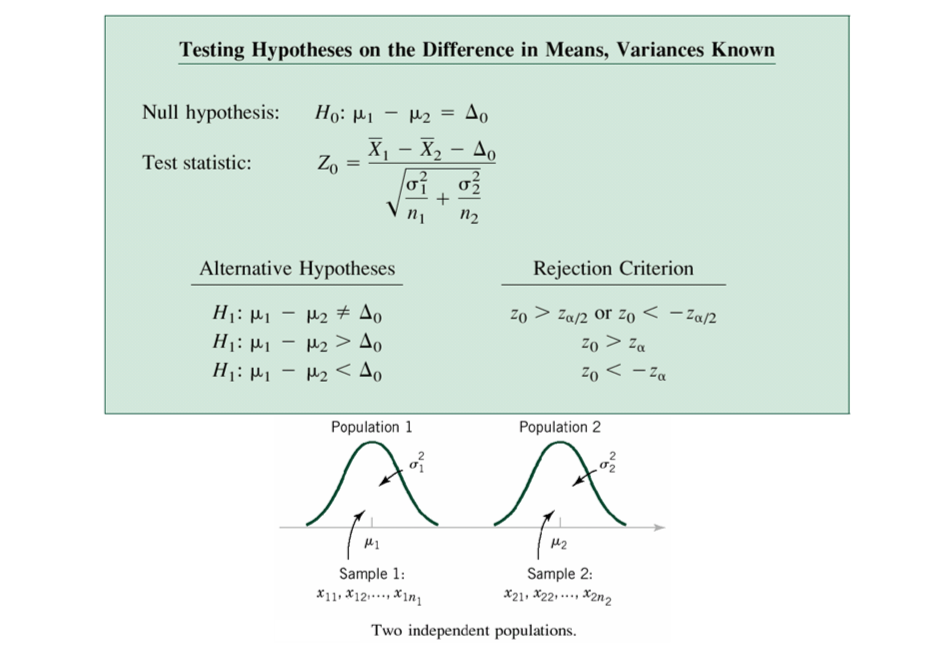

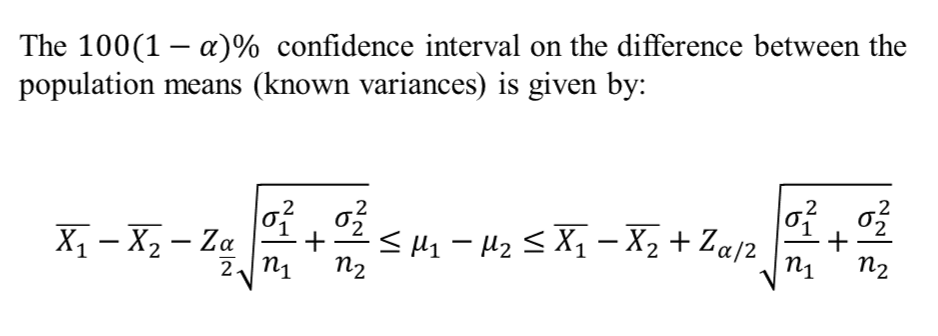

In [ ]:
t0, p_value_t0 = stats.ttest_ind(data1, data2, equal_var=True)
print('t-test: t0 = %.3f' % t0)
print('p-value for t-test: %.3f' % p_value_t0)

### Point 2

Compute the Type II error expression in the variance equality test and compute the test power when the true variance of the first supplier is 1.5 times larger than the one of the second supplier.

> The Type II error is the probability of accepting the null hypothesis when it is false.
> $$\beta = Pr(\text{accept } H_0 \text{ when } H_1 \text{ is true})$$
>
> Let's expand the formula for the F-test:
> $$\beta = Pr \left(F_{1-\alpha/2,n_1-1,n_2-1} \leq \frac{s_1^2}{s_2^2} \leq F_{\alpha/2,n_1-1,n_2-1} \mid \frac{\sigma_1^2}{\sigma_2^2} = \delta \neq 1 \right)$$
>
> If we multiply all the terms by $\sigma_2^2 / \sigma_1^2$ we get:
> $$ \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \sim F_{n_1-1,n_2-1}$$
>
> If we substitute $\sigma_2^2 / \sigma_1^2$ with the ratio we want to test, we get:
> $$ \beta = Pr \left( \frac{F_{1-\alpha/2,n_1-1,n_2-1}}{1.5} \leq \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \leq \frac{F_{\alpha/2,n_1-1,n_2-1}}{1.5} \right)$$
>
> Rearranging the terms we get:
> $$ \beta = Pr \left( \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \leq \frac{F_{\alpha/2,n_1-1,n_2-1}}{1.5} \right) - Pr \left( \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \leq \frac{F_{1-\alpha/2,n_1-1,n_2-1}}{1.5} \right)$$

In [ ]:
ratio = 1.5 # ratio between the variances of the two samples

beta = stats.f.cdf(stats.f.ppf(1-alpha/2, df1, df2)/ratio, df1, df2) - stats.f.cdf(stats.f.ppf(alpha/2, df1, df2)/ratio, df1, df2)
print('Power of the test: %.3f' % (1-beta))

--------
-------

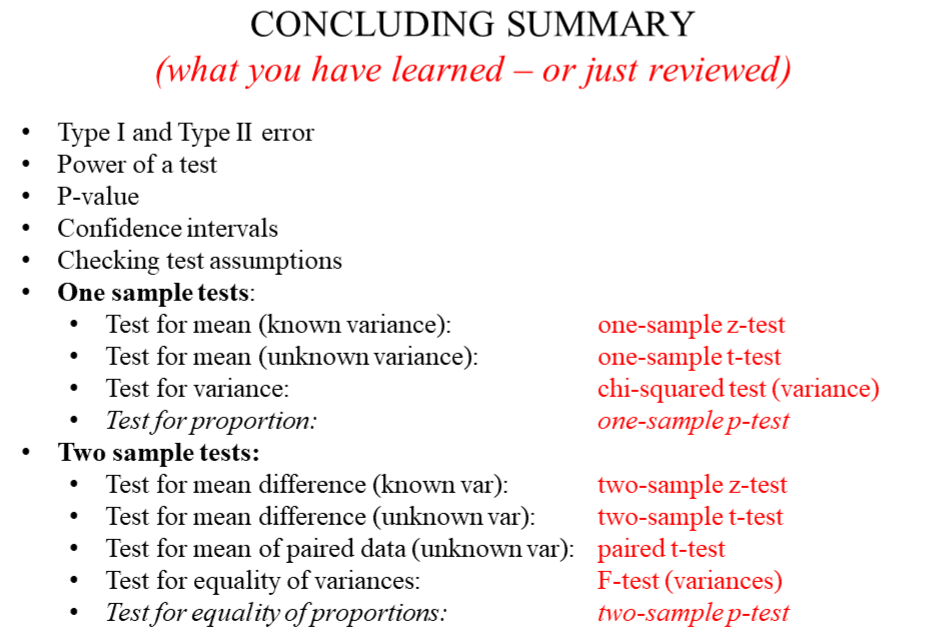